# Categorical encoding



# 1. Data reading & splitting

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# reading
url = "https://drive.google.com/file/d/1Fs4429qOsWxNxENnwIRG4SZNdadIE8UM/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

#Set X and y
X = data
y = X.pop("Expensive")
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.2,
                                                            random_state=123)

housing_df = pd.read_csv(path)
housing_df.head(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc


# The Data

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

CentralAir: Central air conditioning

       N	No
       Y	Yes

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood


# 2. Categorical encoding - "MANUAL" approach (Without using Pipelines)

# 2.1. Replacing NaNs

We will need two different strategies to deal with missing values in numerical and categorical features.

#### 2.1.1. Replacing NaNs in categorical features


# 2.1.1. Replacing NaNs in categorical features

We were imputing the mean to NaN’s on our preprocessing pipeline for numerical features. There's a problem with categorical values: they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”. It is not an elegant solution, but it will allow us to move forward.

In [3]:
#Selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

#Defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant",
                            fill_value="N_A").set_output(transform='pandas')

#Fitting and transforming
X_cat_imputed = cat_imputer.fit_transform(X_train_cat)

X_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
318,RL,Norm,GasA,Pave,Y,PConc
580,RL,Norm,GasA,Pave,Y,CBlock
961,RL,PosN,GasA,Pave,Y,CBlock
78,RL,Norm,GasA,Pave,N,CBlock
5,RL,Norm,GasA,Pave,Y,Wood


# 2.1.2 Replacing NaNs in Numerical Features

In [4]:

#Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

#Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

#Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_train_num)

X_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


# Concatenating All Columns

In [5]:
#Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,RL,Norm,GasA,Pave,Y,PConc,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,RL,Norm,GasA,Pave,Y,CBlock,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,RL,PosN,GasA,Pave,Y,CBlock,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0
78,RL,Norm,GasA,Pave,N,CBlock,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0
5,RL,Norm,GasA,Pave,Y,Wood,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0


# 2.2 One Hot Encoding

One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.

Fitting the OneHotEncoder. As with any transformer, we have to:

1.Import it

2.Initialize it

3.Fit it to the data

4.Use it to transform the data

In [6]:
#Import
from sklearn.preprocessing import OneHotEncoder

#Initialize
my_onehot = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')

#Fit
my_onehot.fit(X_cat_imputed)

#Transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

NOTE: If we leave sparse_output=True, the result will be a "sparse matrix": an object that Scikit-Learn creates when a matrix contains mostly zeros. In that case we would not be able to use .set_output(transform='pandas').

In [7]:
X_cat_imputed_onehot.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
961,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
78,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
#displaying all columns
pd.set_option('display.max_columns', None)
display(X_cat_imputed_onehot)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
961,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
78,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1406,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


We can see that all the columns contain either 0's or 1's. This is exactly how "one-hot" encoded columns (also called "dummy columns") look like: binary categories.

Each column has the name of the original column, an underscore and the name of the category:

# 2.3.3. Concatenating "one-hot" columns with numerical columns:

In [9]:
X_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed], axis=1)

X_imputed.head(3)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
318,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0
580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0
961,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0


# 3. Categorical encoding - "Automated" approach (Using Pipelines)


All the steps in the manual approach can be synthetised by using Scikit-Learn Pipelines and specifically something called ColumnTransformer, which allows us to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated. Let's see the process in action:

# 3.1. Creating the "numeric pipe" and the "categoric pipe"

In [11]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

# 3.2. Using make_column_transformer for a pipeline with 2 branches (the preprocessor)

We simply tell the pipeline the following:

One branch will apply the steps in the numeric_pipe to the columns named in X_num_columns
The second branch will apply the steps in the categoric_pipe to the columns named in X_cat_columns

In [12]:
from sklearn.compose import make_column_transformer
#creating a preprocessor using make_column_transformer
preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

# 3.3. Creating the full_pipeline (preprocessor + Decision Tree)

Pipelines are modular. The preprocessor we created above with the make_column_transformer can become now a step in a new pipeline, that we'll call full_pipeline and will include, as a last step, a Decision Tree model:

In [13]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

We can then fit this full_pipeline to the data:

In [14]:
# Notice that we did not fit the `preprocessor` before — we only fit the pipeline once it has been fully assembled.
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

This full pipeline can make predictions, as can any other pipeline that ends with a model:

In [15]:
predictions = full_pipeline.predict(X_train)
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [16]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'dtree': 0.9186786985070248}

# 3.4 Accessing steps of the pipeline

The estimators of a pipeline are stored as a list in the steps attribute, but can be accessed by index or name by indexing the Pipeline:

In [17]:
# first step in our pipeline is Simpleimputer
full_pipeline[0]

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

# 3.5 Including the imputer to the GridSearchCV

If you want to include a parameter to the parameter grid you have to navigate through the pipe. For example, if one wants to include the SimpleImputer of the numerical pipe into the grid search the path to the SimpleImputer must be given. In this case the path is: columntransformet-pipeline-1-simpleimputer. One can see every step on the diagram of the pipe. Have in mind that in the parameter grid dictionary each step is distinguished one from another by the two lower dashes

In [18]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 9}

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for GridSearchCV, updating paths to match exact pipeline component names
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy": ["mean", "median"],  # Imputer strategy in numeric pipeline
    "decisiontreeclassifier__max_depth": range(2, 14, 2),                          # Depth of the tree
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)                    # Min samples per leaf
}

# Define GridSearchCV with cross-validation
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

# Fit GridSearchCV on the training data
search.fit(X_train, y_train)

# Get the best parameters and display them
best_param = search.best_params_
print("Best Parameters:", best_param)

# Calculate training accuracy using the best estimator from GridSearchCV
train_accuracy = accuracy_score(y_train, search.predict(X_train))
print("Training Accuracy:", round(train_accuracy,2))

# Calculate test accuracy using the best estimator from GridSearchCV
test_accuracy = accuracy_score(y_test, search.predict(X_test))
print("Test Accuracy:", round(test_accuracy,2))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'columntransformer__pipeline-1__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 9}
Training Accuracy: 0.93
Test Accuracy: 0.91


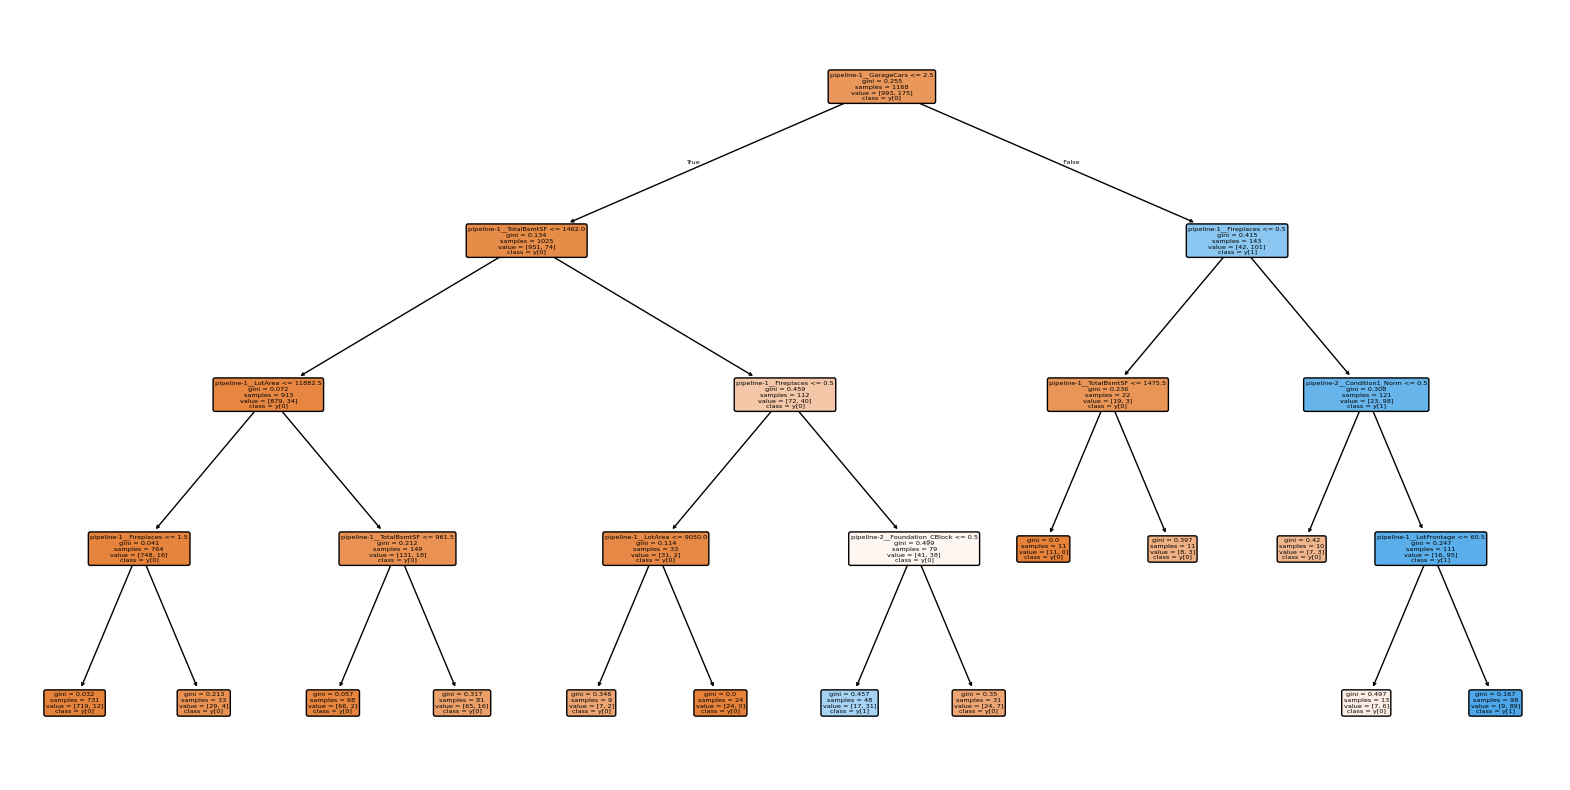

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract transformed feature names from the ColumnTransformer in the pipeline
# Replace 'columntransformer' with the exact name of the ColumnTransformer in your pipeline if it differs
feature_names = search.best_estimator_.named_steps['columntransformer'].get_feature_names_out()

# Access the best decision tree model from GridSearchCV
best_tree = search.best_estimator_.named_steps['decisiontreeclassifier']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=feature_names, class_names=True, rounded=True)
plt.show()



# 3.6 Using the new Pipeline(with branches) to train a DecisionTree with GridSearch Cross Validation.

In [ ]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier()).set_output(transform='pandas')


param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }



search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1,
                      error_score='raise')

search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                                        ('pipeline-2',
                                                                         Pipeline(st...
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             verbose=1)

In [ ]:
best_param = search.best_params_
print("Best Parameters:", best_param)

train_accuracy = accuracy_score(y_train, search.predict(X_train))
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, search.predict(X_test))
print("Test Accuracy:", test_accuracy)

Best Parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 38}
Training Accuracy: 0.9409246575342466
Test Accuracy: 0.9075342465753424
